In [51]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("tagsets")
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, wordnet

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/quinten/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/quinten/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/quinten/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/quinten/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to /home/quinten/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/quinten/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [92]:
example_string = """
given a http request with parameter "input" of type numeric and parameter "location" equals \"http\""""

In [95]:
stop_words = set(stopwords.words("english"))
stop_words.remove('of')
stop_words.remove('and')

In [96]:
lemmatizer = WordNetLemmatizer()
tag_map = defaultdict(lambda: wordnet.NOUN)
tag_map['J'] = wordnet.ADJ # TODO: Is deze tag map af?
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV
    
def lemmatize(tokens):
    return [(lemmatizer.lemmatize(token[0], pos=tag_map[token[1]]), token[1]) for token in tokens]

def tokenize(sentence):
#     stemmer = SnowballStemmer(language="english")# stemmer.stem(token)
    tokens = [word for word in word_tokenize(sentence) if word.casefold() not in stop_words]
    return lemmatize(nltk.pos_tag(tokens))

def tokenizeMultiSentence(sentences):
    return [tokenize(sentence) for sentence in sent_tokenize(sentences)]

example_tokens = tokenize(example_string)
example_tokens

[('given', 'VBN'),
 ('http', 'JJ'),
 ('request', 'NN'),
 ('parameter', 'NN'),
 ('``', '``'),
 ('input', 'NN'),
 ("''", "''"),
 ('of', 'IN'),
 ('type', 'NN'),
 ('numeric', 'NN'),
 ('and', 'CC'),
 ('parameter', 'NN'),
 ('``', '``'),
 ('location', 'NN'),
 ("''", "''"),
 ('equal', 'NNS'),
 ('``', '``'),
 ('http', 'NNS'),
 ("''", "''")]

In [80]:
# NN(Nouns) is pijltje
# JJ(Adjectives) is property van NN
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

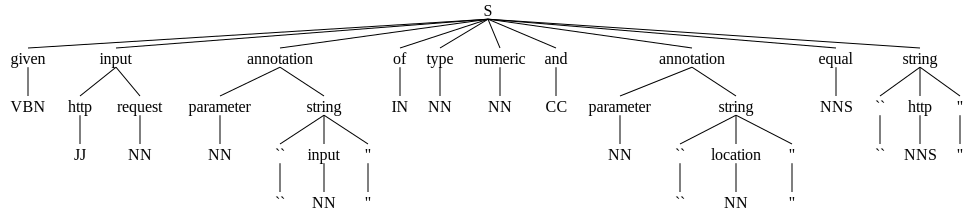

In [99]:
def treeGen(taggedTokens):
    # Named Entity Recognition gebruiken?
    # TODO: Grammer uitbreiden om sense te maken van de zin
    # NP: {<DT>?<JJ>*<NN>}
    grammer = """
        input: ^<VBN>{<JJ>*<NN>}
        string: {<``><.*>*?<''>}
        annotation: {<NN><JJ|string>}
        condition: {annotation<IN><NN>+}
        
        conjunction: {}
    """
    chunk_parser = nltk.RegexpParser(grammer)
    
    return chunk_parser.parse(taggedTokens)

treeGen(example_tokens)